In [81]:
# Library cleaning and preprocessing data
import pandas as pd
import numpy as np
import datetime as dt

# Library for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Library to ignore future warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [82]:
olist_customer=pd.read_csv('https://drive.google.com/uc?id=1LH04HN8DH2lNoU7KY2Um6lYhg9bMvRke')
olist_geoloc=pd.read_csv('https://drive.google.com/uc?id=1B-F6jKGo9Bqw6OmI8EmRkr8IoQyM07lR')
olist_order_items=pd.read_csv('https://drive.google.com/uc?id=1ecKtw7aP1rp6b7SYPpjTHzSMNR_QU_Go')
olist_order_payments=pd.read_csv('https://drive.google.com/uc?id=1s4qrcF6vV5ipuVzqQlz_XPC1wuGq02eO')
olist_order_review=pd.read_csv('https://drive.google.com/uc?id=1W32yNWa6X6lc12KWCkRzH207Awe-I_HR')
olist_orders=pd.read_csv('https://drive.google.com/uc?id=1UNVBZumLc3FJjMj4TpezuquBHk845HkH')
olist_product=pd.read_csv('https://drive.google.com/uc?id=1rg9umj1WR8DnS2iZa8xjH9SpF7qSs_Un')
olist_sellers=pd.read_csv('https://drive.google.com/uc?id=129aMemfibvtFzQqLhnkW7QL_0q5Bo53t')
olist_product_translation=pd.read_csv('https://drive.google.com/uc?id=1uRxWSxCMps41ZFs_dwY3LB4YVlJ3gIGS')

In [83]:
df=pd.merge(olist_orders,olist_order_payments,on="order_id")
df=df.merge(olist_customer,on="customer_id")
df=df.merge(olist_order_items,on="order_id")
df=df.merge(olist_product,on="product_id")
df=df.merge(olist_product_translation,on="product_category_name")
df=df.merge(olist_order_review,on="order_id")
df=df.merge(olist_sellers,on="seller_id")

In [84]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,housewares,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,housewares,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,9350,maua,SP


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

In [8]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0


In [9]:
#check for duplicated value
df.duplicated().sum()

0

In [10]:
# Convert datetime columns to  datetime format
datetime_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
    "review_creation_date",
    "review_answer_timestamp",
]

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col])



In [11]:
df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix
count,115609,115595,114414,113209,115609,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,...,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609,115609,115609.000000
mean,2017-12-31 04:27:50.933335296,2017-12-31 15:53:50.673195520,2018-01-04 05:48:14.275464704,2018-01-13 17:20:24.922400256,2018-01-24 01:15:13.973825792,1.093747,2.946233,172.387379,35061.537597,1.194535,...,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,4.034409,2018-01-12 17:48:57.259209728,2018-01-15 21:25:08.146969856,24515.713958
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,0.000000,0.000000,1003.000000,1.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17,1001.000000
25%,2017-09-12 11:14:11,2017-09-12 18:04:35.500000,2017-09-15 17:37:49,2017-09-25 18:12:25,2017-10-03 00:00:00,1.000000,1.000000,60.870000,11310.000000,1.000000,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,2017-09-23 00:00:00,2017-09-26 23:34:04,6429.000000
50%,2018-01-19 03:30:43,2018-01-19 14:57:12,2018-01-23 23:48:29,2018-02-02 01:42:36,2018-02-15 00:00:00,1.000000,2.000000,108.050000,24241.000000,1.000000,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,2018-02-02 00:00:00,2018-02-05 09:08:49,13660.000000
75%,2018-05-04 15:56:31,2018-05-05 02:13:51,2018-05-08 13:01:00,2018-05-15 19:54:56,2018-05-28 00:00:00,1.000000,4.000000,189.480000,58745.000000,1.000000,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,2018-05-16 00:00:00,2018-05-20 12:43:40,28605.000000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,29.000000,24.000000,13664.080000,99980.000000,21.000000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,99730.000000
std,NaN,NaN,NaN,NaN,NaN,0.729849,2.781087,265.873969,29841.671732,0.685926,...,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,1.385584,NaN,NaN,27636.640968


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   payment_sequential             115609 non-null  int64         
 9   payment_type                   115609 non-null  object        
 10  payment_installments           115609 non-null  int64         
 11  

In [13]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0


In [14]:
# Fill missing datetime values
df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace=True)
df['order_delivered_carrier_date'].fillna(df['order_estimated_delivery_date'], inplace=True)
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], inplace=True)


In [15]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0


In [16]:
# Fill missing product dimensions and weight with mean
product_cols = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

for col in product_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [17]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0


In [18]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,...,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,...,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,credit_card,...,housewares,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19,2017-08-20 15:16:36,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,credit_card,...,housewares,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08,2017-08-08 23:26:23,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06,1,credit_card,...,arts_and_craftmanship,a6a6d2f97b28e8aca22046635855fe63,5,Pedido entregue,Recebi em 3 dias muito rápido tudo perfeito pa...,2018-08-25,2018-08-27 16:43:30,95910,lajeado,RS
115605,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16,1,credit_card,...,arts_and_craftmanship,6b7c670a784ae6d3f17ee1d4b28d197e,5,NaN,NaN,2018-08-04,2018-08-05 22:10:19,17201,jau,SP
115606,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,2018-08-24 03:24:24,2018-08-24 15:14:00,2018-08-28 02:06:35,2018-09-03,1,boleto,...,arts_and_craftmanship,24e88b5f641a6a3219ce7a730509d570,5,NaN,Excelente,2018-08-28,2018-08-31 00:26:10,17201,jau,SP
115607,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06,1,credit_card,...,arts_and_craftmanship,ad0de1dda4fa03e8efb68c481b31ebf8,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28,2018-08-03 01:58:42,17201,jau,SP


In [19]:
# Replace missing review comments with placeholder
df['review_comment_title'].fillna("No Title", inplace=True)
df['review_comment_message'].fillna("No Comment", inplace=True)

In [20]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [21]:
# Check for remaining missing values
missing_summary = df.isna().sum()
missing_summary

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [22]:
duplicated_count = df.duplicated().sum()

print(f"Number of duplicated rows: {duplicated_count}")

Number of duplicated rows: 0


In [23]:
# Define a snapshot date (e.g., latest date in the dataset)
snapshot_date = df['order_purchase_timestamp'].max()



# Calculate Recency for each customer
recency = df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days
}).rename(columns={'order_purchase_timestamp': 'Recency'}).reset_index()

In [24]:
# Calculate Frequency: Total number of orders minus one (repeat purchases)
frequency = df.groupby('customer_id').agg({
    'order_id': 'count'
}).rename(columns={'order_id': 'Frequency'}).reset_index()

# Subtract one for repeat purchases
frequency['Frequency'] = frequency['Frequency'] - 1

In [25]:
# Calculate Monetary: Sum of payment_value for each customer
monetary = df.groupby('customer_id').agg({
    'payment_value': 'sum'
}).rename(columns={'payment_value': 'Monetary'}).reset_index()

In [26]:
# Combine Recency, Frequency, and Monetary into one DataFrame
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

# Display the resulting RFM DataFrame
print(rfm.head())


                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      292          0    114.74
1  000161a058600d5901f007fab4c27140      413          0     67.41
2  0001fd6190edaaf884bcaf3d49edf079      551          0    195.42
3  0002414f95344307404f0ace7a26f1d5      382          0    179.35
4  000379cdec625522490c315e70c7a9fb      153          0    107.01


In [27]:
rfm


,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,292,0,114.74
1,000161a058600d5901f007fab4c27140,413,0,67.41
2,0001fd6190edaaf884bcaf3d49edf079,551,0,195.42
3,0002414f95344307404f0ace7a26f1d5,382,0,179.35
4,000379cdec625522490c315e70c7a9fb,153,0,107.01
...,...,...,...,...
96511,fffcb937e9dd47a13f05ecb8290f4d3e,170,0,91.91
96512,fffecc9f79fd8c764f843e9951b11341,157,2,81.36
96513,fffeda5b6d849fbd39689bb92087f431,103,0,63.13
96514,ffff42319e9b2d713724ae527742af25,81,0,214.13


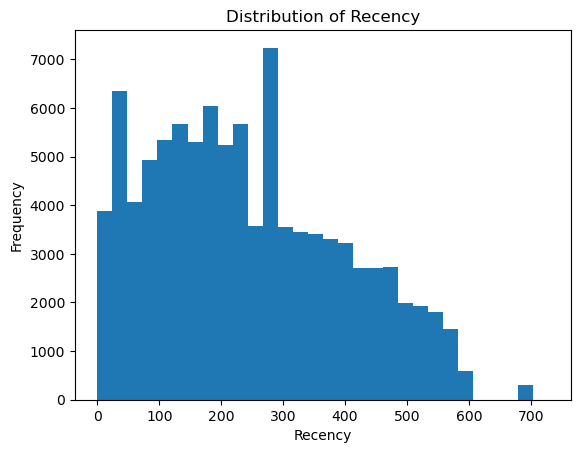

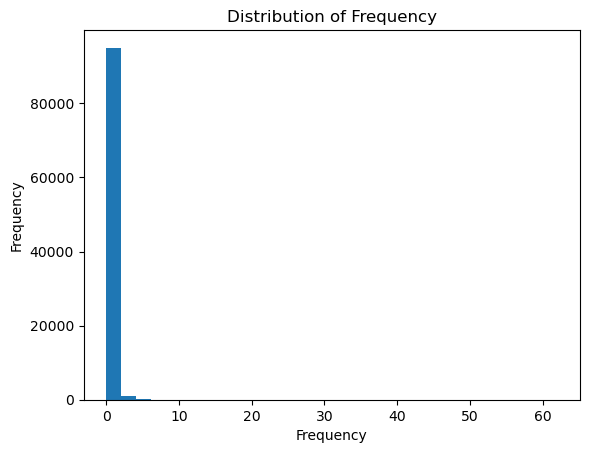

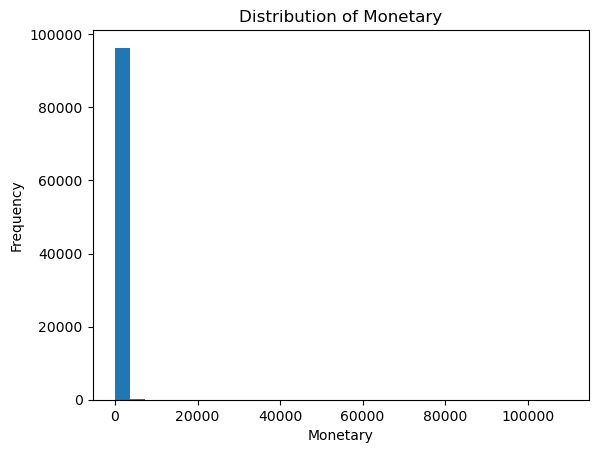

In [26]:
# Histograms for RFM metrics
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure()
    plt.hist(rfm[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
scaled_data=scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

In [31]:
scaled_data

array([[ 0.31330051, -0.26413838, -0.15040864],
       [ 1.10200991, -0.26413838, -0.22799869],
       [ 2.00152972, -0.26413838, -0.01814656],
       ...,
       [-0.91865053, -0.26413838, -0.23501507],
       [-1.06205224, -0.26413838,  0.01252553],
       [ 0.78913346,  1.07109336, -0.18932662]])

In [32]:
scaled_data_df=pd.DataFrame(scaled_data,index=rfm.index,columns=('Recency','Frequency',"Monetary"))

In [33]:
scaled_data_df

,Recency,Frequency,Monetary
0,0.313301,-0.264138,-0.150409
1,1.102010,-0.264138,-0.227999
2,2.001530,-0.264138,-0.018147
3,0.899944,-0.264138,-0.044491
4,-0.592738,-0.264138,-0.163081
...,...,...,...
96511,-0.481927,-0.264138,-0.187835
96512,-0.566665,2.406325,-0.205130
96513,-0.918651,-0.264138,-0.235015
96514,-1.062052,-0.264138,0.012526


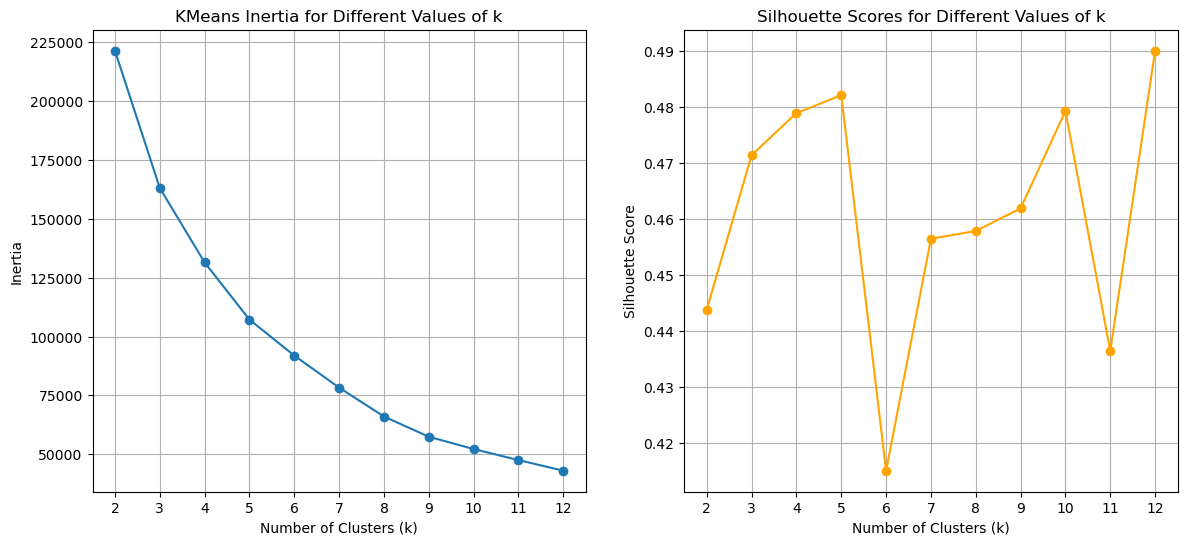

In [34]:
max_k=12
inertia=[]
silhoutte_scores=[]
k_values=range(2,max_k+1)
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)
    cluster_labels=kmeans.fit_predict(scaled_data)
    sil_score=silhouette_score(scaled_data,cluster_labels)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [34]:
kmeans=KMeans(n_clusters=5,random_state=42,max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data_df)

In [35]:
rfm["Cluster"]=cluster_labels+1
rfm

,customer_id,Recency,Frequency,Monetary,Cluster
0,00012a2ce6f8dcda20d059ce98491703,292,0,114.74,1
1,000161a058600d5901f007fab4c27140,413,0,67.41,1
2,0001fd6190edaaf884bcaf3d49edf079,551,0,195.42,1
3,0002414f95344307404f0ace7a26f1d5,382,0,179.35,1
4,000379cdec625522490c315e70c7a9fb,153,0,107.01,5
...,...,...,...,...,...
96511,fffcb937e9dd47a13f05ecb8290f4d3e,170,0,91.91,5
96512,fffecc9f79fd8c764f843e9951b11341,157,2,81.36,2
96513,fffeda5b6d849fbd39689bb92087f431,103,0,63.13,5
96514,ffff42319e9b2d713724ae527742af25,81,0,214.13,5


In [36]:
rfm.groupby(['Cluster'])[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
1,392.944093,0.106983,168.295323
2,247.877262,2.868378,1098.748437
3,233.637500,10.850000,10111.280000
4,338.000000,7.000000,109312.640000
5,132.386437,0.097802,167.436862


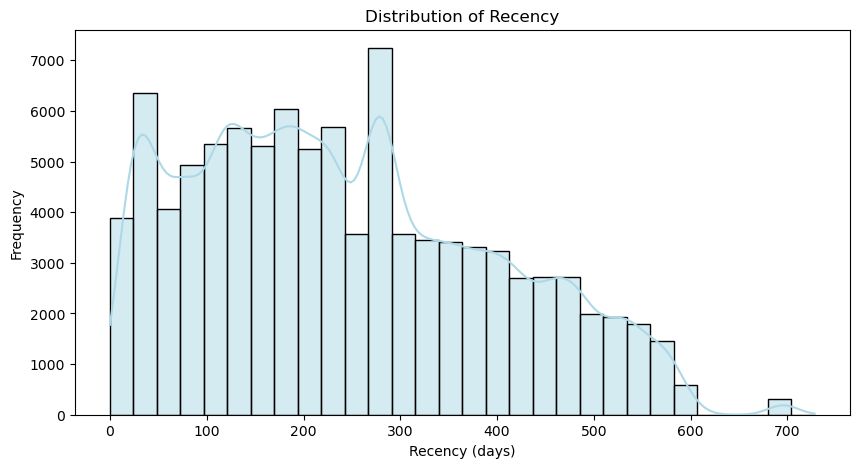

In [36]:
# 1. Distribution of Recency
plt.figure(figsize=(10, 5))
sns.histplot(rfm['Recency'], kde=True, bins=30, color='lightblue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

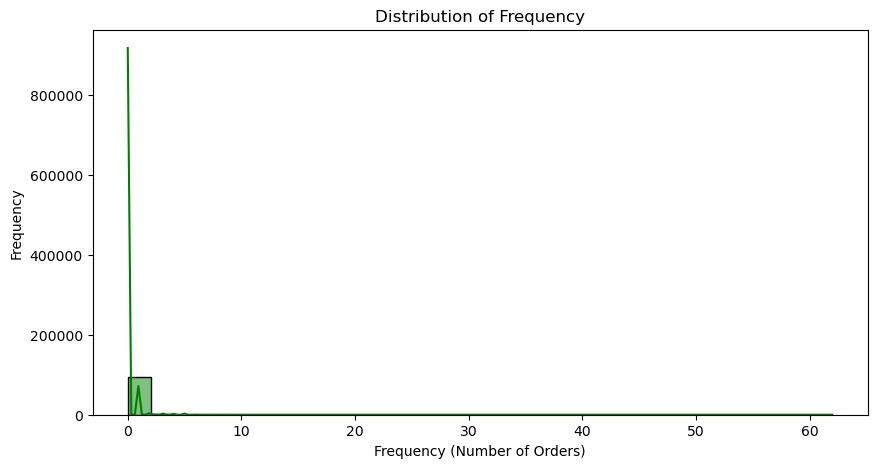

In [37]:
# 2. Distribution of Frequency
plt.figure(figsize=(10, 5))
sns.histplot(rfm['Frequency'], kde=True, bins=30, color='green')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Frequency')
plt.show()

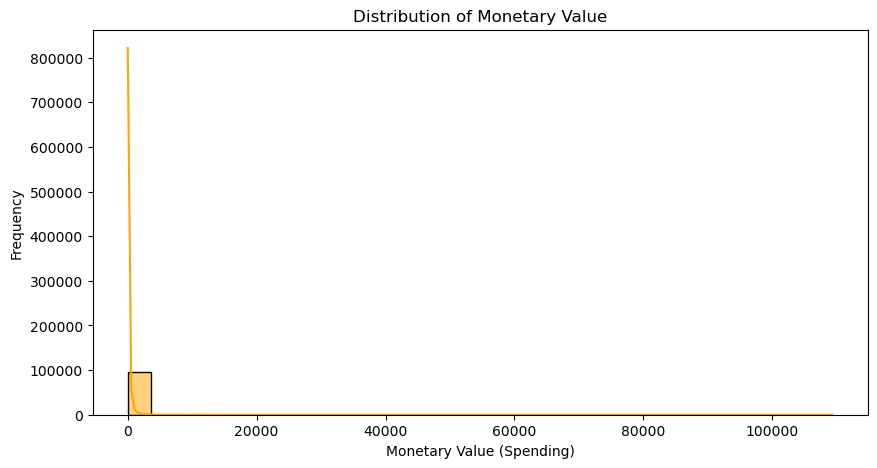

In [38]:
# 3. Distribution of Monetary Value
plt.figure(figsize=(10, 5))
sns.histplot(rfm['Monetary'], kde=True, bins=30, color='orange')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value (Spending)')
plt.ylabel('Frequency')
plt.show()

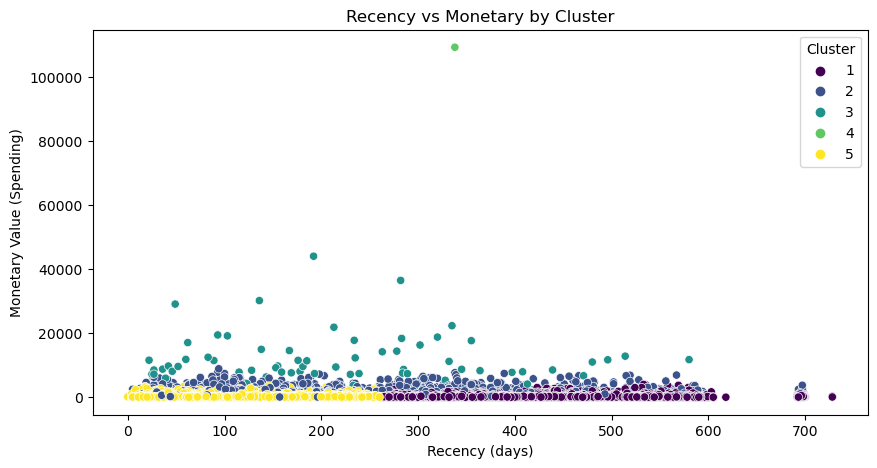

In [39]:
# 4. Scatter Plot: Recency vs Monetary, colored by Cluster
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Recency vs Monetary by Cluster')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value (Spending)')
plt.legend(title='Cluster')
plt.show()

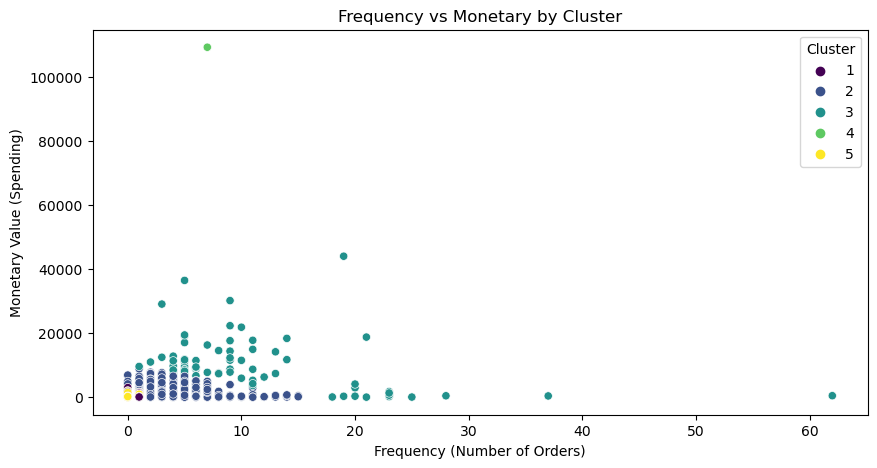

In [40]:
#Scatter Plot: Frequency vs Monetary, colored by Cluster
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Frequency vs Monetary by Cluster')
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Monetary Value (Spending)')
plt.legend(title='Cluster')
plt.show()

In [37]:
# Add AOV (Average Order Value)
rfm['AOV'] = rfm['Monetary'] / (rfm['Frequency'] + 1)

# Add product diversity 
product_diversity = df.groupby('customer_id')['product_id'].nunique()
rfm = rfm.merge(product_diversity.rename('Product_Diversity'), on='customer_id')

# Add average review score 
average_review_score = df.groupby('customer_id')['review_score'].mean()
rfm = rfm.merge(average_review_score.rename('Avg_Review_Score'), on='customer_id')

# Normalize the data
from sklearn.preprocessing import StandardScaler
features = ['Recency', 'Frequency', 'Monetary', 'AOV', 'Product_Diversity', 'Avg_Review_Score']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm[features])

In [42]:
scaled_data

array([[ 0.31330051, -0.26413838, -0.15040864, -0.19939561, -0.16746627,
        -2.33949821],
       [ 1.10200991, -0.26413838, -0.22799869, -0.41794483, -0.16746627,
        -0.08083177],
       [ 2.00152972, -0.26413838, -0.01814656,  0.17314932, -0.16746627,
         0.67205704],
       ...,
       [-0.91865053, -0.26413838, -0.23501507, -0.437708  , -0.16746627,
        -0.08083177],
       [-1.06205224, -0.26413838,  0.01252553,  0.25954391, -0.16746627,
         0.67205704],
       [ 0.78913346,  1.07109336, -0.18932662, -0.51911562, -0.16746627,
         0.67205704]])

In [51]:


# Test multiple combinations of parameters
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15]
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)
        if len(set(labels)) > 1:  # At least 2 clusters should be formed
            score = silhouette_score(scaled_data, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]} with Silhouette Score: {best_score}")

eps: 0.5, min_samples: 5, Silhouette Score: 0.06700042049599758
eps: 0.5, min_samples: 10, Silhouette Score: 0.06663610049673964
eps: 0.5, min_samples: 15, Silhouette Score: 0.0711068043629503
eps: 1.0, min_samples: 5, Silhouette Score: 0.218492965574784
eps: 1.0, min_samples: 10, Silhouette Score: 0.22066939208477426
eps: 1.0, min_samples: 15, Silhouette Score: 0.21833392532280657
eps: 1.5, min_samples: 5, Silhouette Score: 0.5900662261540464
eps: 1.5, min_samples: 10, Silhouette Score: 0.5889964685667606
eps: 1.5, min_samples: 15, Silhouette Score: 0.5887217696768174
eps: 2.0, min_samples: 5, Silhouette Score: 0.5915354340030087
eps: 2.0, min_samples: 10, Silhouette Score: 0.5934447008779062
eps: 2.0, min_samples: 15, Silhouette Score: 0.5933564298256683
Best parameters: eps=2.0, min_samples=10 with Silhouette Score: 0.5934447008779062


In [40]:
rfm_copy=rfm.copy()

In [44]:
rfm_copy

,customer_id,Recency,Frequency,Monetary,Cluster,AOV,Product_Diversity,Avg_Review_Score
0,00012a2ce6f8dcda20d059ce98491703,292,0,114.74,1,114.74,1,1.0
1,000161a058600d5901f007fab4c27140,413,0,67.41,1,67.41,1,4.0
2,0001fd6190edaaf884bcaf3d49edf079,551,0,195.42,1,195.42,1,5.0
3,0002414f95344307404f0ace7a26f1d5,382,0,179.35,1,179.35,1,5.0
4,000379cdec625522490c315e70c7a9fb,153,0,107.01,5,107.01,1,4.0
...,...,...,...,...,...,...,...,...
96511,fffcb937e9dd47a13f05ecb8290f4d3e,170,0,91.91,5,91.91,1,5.0
96512,fffecc9f79fd8c764f843e9951b11341,157,2,81.36,2,27.12,1,3.0
96513,fffeda5b6d849fbd39689bb92087f431,103,0,63.13,5,63.13,1,4.0
96514,ffff42319e9b2d713724ae527742af25,81,0,214.13,5,214.13,1,5.0


In [42]:
# Scaled features for DBSCAN
features = ['Recency', 'Frequency', 'Monetary', 'AOV', 'Product_Diversity', 'Avg_Review_Score']

In [43]:
# Iterate through each main cluster and apply DBSCAN
subcluster_labels = []

for cluster_id in rfm_copy['Cluster'].unique():
    # Filter data for the current main cluster
    cluster_data = rfm_copy[rfm_copy['Cluster'] == cluster_id]
    cluster_features = cluster_data[features]
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_cluster_features = scaler.fit_transform(cluster_features)
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=2.0, min_samples=10)  # Using the best parameters
    labels = dbscan.fit_predict(scaled_cluster_features)
    
    # Assign subcluster labels
    rfm_copy.loc[rfm_copy['Cluster'] == cluster_id, 'Subcluster'] = labels

In [44]:
# Convert Subcluster labels to integers
rfm_copy['Subcluster'] = rfm_copy['Subcluster'].astype(int)

In [45]:
rfm_copy['Subcluster'].unique()

array([ 0,  1,  2,  3, -1,  4])

In [46]:
subcluster_analysis =rfm_copy.groupby(['Cluster', 'Subcluster'])[['Recency', 'Frequency', 'Monetary', 'AOV', 'Product_Diversity', 'Avg_Review_Score']].mean()

In [47]:
subcluster_analysis

Recency  Frequency       Monetary           AOV  \
Cluster Subcluster                                                       
1       -1          458.578947   0.421053    2452.343684   2155.032105   
         0          392.615300   0.000000     148.292454    148.292454   
         1          395.452344   1.000000     293.611046    146.805523   
         2          390.656375   1.000000     387.297112    193.648556   
         3          561.600000   2.000000      67.276000     22.425333   
         4          466.388889   0.000000    2856.407778   2856.407778   
2       -1          246.392857   3.785714    4056.875357   2521.179964   
         0          247.891066   2.859847    1071.240116    303.759178   
3       -1          237.666667  15.333333   15825.969167   2366.959833   
         0          232.926471  10.058824    9102.805441   1220.683821   
4       -1          338.000000   7.000000  109312.640000  13664.080000   
5       -1          102.928571   0.214286    2767.297857   2580.377143   
         0          132.042641   0.000000     148.985303    148.985303   
         1          131.994578   1.000000     406.909249    203.454624   
         2          136.833503   1.000000     305.744807    152.872403   

                    Product_Diversity  Avg_Review_Score  
Cluster Subcluster                                       
1       -1                   1.105263          2.578947  
         0                   1.000000          4.162427  
         1                   1.000000          3.955759  
         2                   2.000000          3.544821  
         3                   1.000000          3.600000  
         4                   1.000000          4.777778  
2       -1                   2.642857          3.803571  
         0                   1.411159          3.574781  
3       -1                   3.750000          1.833333  
         0                   1.352941          3.066176  
4       -1                   1.000000          1.000000  
5       -1                   1.214286          3.357143  
         0                   1.000000          4.164883  
         1                   2.000000          3.318358  
         2                   1.000000          3.874936

In [48]:
def func(row):
    if row["Cluster"]==1:
        return 'Low-Engagement, Mixed Behavior Customers'
    elif row["Cluster"]==2:
        return 'Moderate-Engagement, Medium-Spend Customers'
    elif row['Cluster']==3:
        return 'High-Engagement, High-Spend Customers'
    elif row['Cluster']==4:
        return 'Premium, High-Value Customers'
    else:
        return 'Low-Engagement, Low-Value Customers'

In [49]:
rfm_copy["Main label"]=rfm_copy.apply(func,axis=1)

,Recency,Frequency,Monetary
Cluster,,,
1,392.944093,0.106983,168.295323
2,247.877262,2.868378,1098.748437
3,233.637500,10.850000,10111.280000
4,338.000000,7.000000,109312.640000
5,132.386437,0.097802,167.436862


In [58]:
rfm_copy.head()

,customer_id,Recency,Frequency,Monetary,Cluster,AOV,Product_Diversity,Avg_Review_Score,Subcluster,Main label
0,00012a2ce6f8dcda20d059ce98491703,292,0,114.74,1,114.74,1,1.0,0,"Low-Engagement, Mixed Behavior Customers"
1,000161a058600d5901f007fab4c27140,413,0,67.41,1,67.41,1,4.0,0,"Low-Engagement, Mixed Behavior Customers"
2,0001fd6190edaaf884bcaf3d49edf079,551,0,195.42,1,195.42,1,5.0,0,"Low-Engagement, Mixed Behavior Customers"
3,0002414f95344307404f0ace7a26f1d5,382,0,179.35,1,179.35,1,5.0,0,"Low-Engagement, Mixed Behavior Customers"
4,000379cdec625522490c315e70c7a9fb,153,0,107.01,5,107.01,1,4.0,0,"Low-Engagement, Low-Value Customers"


In [50]:
def subcluster_func(row):
    if row["Cluster"] == 1:
        if row["Subcluster"] == -1:
            return 'Dormant High-Value Customers'
        elif row["Subcluster"] == 0:
            return 'Inactive Low-Value Customers'
        elif row["Subcluster"] == 1:
            return 'Single-Purchase Customers'
        elif row["Subcluster"] == 2:
            return 'Low-Engagement, Multi-Product Buyers'
        elif row["Subcluster"] == 3:
            return 'Minimal Engagement Customers'
        elif row["Subcluster"] == 4:
            return 'Dormant High-Spend Customers'
    elif row["Cluster"] == 2:
        if row["Subcluster"] == -1:
            return 'Consistent Medium-Spend Customers'
        elif row["Subcluster"] == 0:
            return 'Frequent Moderate-Spend Customers'
    elif row["Cluster"] == 3:
        if row["Subcluster"] == -1:
            return 'High-Spending, Loyal Customers'
        elif row["Subcluster"] == 0:
            return 'High-Engagement, Moderate-Spend Customers'
    elif row["Cluster"] == 4:
        if row["Subcluster"] == -1:
            return 'Exclusive High-Value Customers'
    elif row["Cluster"] == 5:
        if row["Subcluster"] == -1:
            return 'Dormant Moderate-Spend Customers'
        elif row["Subcluster"] == 0:
            return 'Completely Inactive Customers'
        elif row["Subcluster"] == 1:
            return 'Low-Spend One-Time Purchasers'
        elif row["Subcluster"] == 2:
            return 'Sporadic Low-Spend Customers'
    else:
        return 'Unknown Subcluster'


In [51]:
rfm_copy["Sub label"]=rfm_copy.apply(subcluster_func,axis=1)

In [52]:
rfm_copy.head()

,customer_id,Recency,Frequency,Monetary,Cluster,AOV,Product_Diversity,Avg_Review_Score,Subcluster,Main label,Sub label
0,00012a2ce6f8dcda20d059ce98491703,292,0,114.74,1,114.74,1,1.0,0,"Low-Engagement, Mixed Behavior Customers",Inactive Low-Value Customers
1,000161a058600d5901f007fab4c27140,413,0,67.41,1,67.41,1,4.0,0,"Low-Engagement, Mixed Behavior Customers",Inactive Low-Value Customers
2,0001fd6190edaaf884bcaf3d49edf079,551,0,195.42,1,195.42,1,5.0,0,"Low-Engagement, Mixed Behavior Customers",Inactive Low-Value Customers
3,0002414f95344307404f0ace7a26f1d5,382,0,179.35,1,179.35,1,5.0,0,"Low-Engagement, Mixed Behavior Customers",Inactive Low-Value Customers
4,000379cdec625522490c315e70c7a9fb,153,0,107.01,5,107.01,1,4.0,0,"Low-Engagement, Low-Value Customers",Completely Inactive Customers


In [ ]:
rfm_copy

In [85]:
rfm_copy.groupby(['Main label'])[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Main label,,,
"High-Engagement, High-Spend Customers",233.637500,10.850000,10111.280000
"Low-Engagement, Low-Value Customers",132.386437,0.097802,167.436862
"Low-Engagement, Mixed Behavior Customers",392.944093,0.106983,168.295323
"Moderate-Engagement, Medium-Spend Customers",247.877262,2.868378,1098.748437
"Premium, High-Value Customers",338.000000,7.000000,109312.640000


In [65]:
#to be used in tableau
rfm_copy.to_csv("clusters_with_descriptions.csv", index=False)


In [66]:
result=rfm_copy["Sub label"].value_counts()

In [68]:
rfm_copy["customer_id"].nunique()

96516

In [79]:
count = rfm_copy["Main label"].value_counts()["Premium, High-Value Customers"]
print(count)



1


In [82]:
rfm_copy[rfm_copy["Main label"] == "Premium, High-Value Customers"]

,customer_id,Recency,Frequency,Monetary,Cluster,AOV,Product_Diversity,Avg_Review_Score,Subcluster,Main label,Sub label
8316,1617b1357756262bfa56ab541c47bc16,338,7,109312.64,4,13664.08,1,1.0,-1,"Premium, High-Value Customers",Exclusive High-Value Customers


In [83]:
rfm_copy["Main label"].value_counts()

Main label
Low-Engagement, Low-Value Customers            53455
Low-Engagement, Mixed Behavior Customers       39941
Moderate-Engagement, Medium-Spend Customers     3039
High-Engagement, High-Spend Customers             80
Premium, High-Value Customers                      1
Name: count, dtype: int64

<Axes: ylabel='Sub label'>

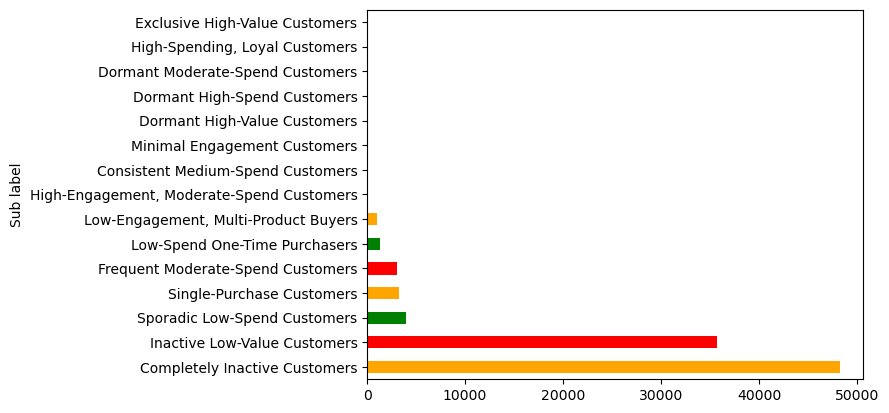

In [ ]:
rfm.groupby(['Cluster'])[['Recency','Frequency','Monetary']].mean()

In [54]:
rfm_copy1=rfm.copy()

In [55]:
rfm_copy1

,customer_id,Recency,Frequency,Monetary,Cluster,AOV,Product_Diversity,Avg_Review_Score
0,00012a2ce6f8dcda20d059ce98491703,292,0,114.74,1,114.74,1,1.0
1,000161a058600d5901f007fab4c27140,413,0,67.41,1,67.41,1,4.0
2,0001fd6190edaaf884bcaf3d49edf079,551,0,195.42,1,195.42,1,5.0
3,0002414f95344307404f0ace7a26f1d5,382,0,179.35,1,179.35,1,5.0
4,000379cdec625522490c315e70c7a9fb,153,0,107.01,5,107.01,1,4.0
...,...,...,...,...,...,...,...,...
96511,fffcb937e9dd47a13f05ecb8290f4d3e,170,0,91.91,5,91.91,1,5.0
96512,fffecc9f79fd8c764f843e9951b11341,157,2,81.36,2,27.12,1,3.0
96513,fffeda5b6d849fbd39689bb92087f431,103,0,63.13,5,63.13,1,4.0
96514,ffff42319e9b2d713724ae527742af25,81,0,214.13,5,214.13,1,5.0


In [53]:
scaled_data

array([[ 0.31330051, -0.26413838, -0.15040864, -0.19939561, -0.16746627,
        -2.33949821],
       [ 1.10200991, -0.26413838, -0.22799869, -0.41794483, -0.16746627,
        -0.08083177],
       [ 2.00152972, -0.26413838, -0.01814656,  0.17314932, -0.16746627,
         0.67205704],
       ...,
       [-0.91865053, -0.26413838, -0.23501507, -0.437708  , -0.16746627,
        -0.08083177],
       [-1.06205224, -0.26413838,  0.01252553,  0.25954391, -0.16746627,
         0.67205704],
       [ 0.78913346,  1.07109336, -0.18932662, -0.51911562, -0.16746627,
         0.67205704]])

In [ ]:
rfm.groupby(['Cluster'])[['Recency','Frequency','Monetary']].mean()

In [56]:
rfm_copy.groupby(['Main label'])[['Recency','Frequency','Monetary','Product_Diversity','AOV','Avg_Review_Score']].mean()

,Recency,Frequency,Monetary,Product_Diversity,AOV,Avg_Review_Score
Main label,,,,,,
"High-Engagement, High-Spend Customers",233.637500,10.850000,10111.280000,1.712500,1392.625223,2.881250
"Low-Engagement, Low-Value Customers",132.386437,0.097802,167.436862,1.024207,151.223658,4.122888
"Low-Engagement, Mixed Behavior Customers",392.944093,0.106983,168.295323,1.025187,151.424697,4.129478
"Moderate-Engagement, Medium-Spend Customers",247.877262,2.868378,1098.748437,1.422507,324.189511,3.576889
"Premium, High-Value Customers",338.000000,7.000000,109312.640000,1.000000,13664.080000,1.000000


In [75]:
# Funtional testing

In [76]:
def test_correct_output():
    print("Testing Correct Output")
    # Simplified dataset
    data = {
        'Recency': [10, 20],
        'Frequency': [5, 10],
        'Monetary': [100, 200]
    }
    df = pd.DataFrame(data)

    # Standardizing the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # K-Means Clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_data)

    # Output validation
    print("Clustered Data:")
    print(df)
    print("Correct Output Test Completed\n")

In [77]:
def test_execution_time():
    print("Testing Execution Time")
    # Small synthetic dataset
    data = {
        'Recency': np.random.randint(1, 100, 1000),
        'Frequency': np.random.randint(1, 50, 1000),
        'Monetary': np.random.randint(10, 1000, 1000)
    }
    df = pd.DataFrame(data)

    # Measure execution time
    start_time = time.time()

    # Preprocessing
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_data)

    end_time = time.time()
    print(f"Execution Time: {end_time - start_time:.2f} seconds\n")


In [78]:
def test_system_performance():
    print("Testing System Performance Under Load")
    # Test with different sizes
    sizes = [100, 500, 1000]
    for size in sizes:
        print(f"\nTesting with {size} rows:")

        # Generate data
        data = {
            'Recency': np.random.randint(1, 100, size),
            'Frequency': np.random.randint(1, 50, size),
            'Monetary': np.random.randint(10, 1000, size)
        }
        df = pd.DataFrame(data)

        # Measure time
        start_time = time.time()
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df)
        kmeans = KMeans(n_clusters=3, random_state=42)
        df['Cluster'] = kmeans.fit_predict(scaled_data)
        end_time = time.time()

        print(f"Execution Time for {size} rows: {end_time - start_time:.2f} seconds\n")

In [80]:
test_correct_output()
test_execution_time()
test_system_performance()

Testing Correct Output
Clustered Data:
   Recency  Frequency  Monetary  Cluster
0       10          5       100        0
1       20         10       200        1
Correct Output Test Completed

Testing Execution Time
Execution Time: 0.05 seconds

Testing System Performance Under Load

Testing with 100 rows:
Execution Time for 100 rows: 0.02 seconds


Testing with 500 rows:
Execution Time for 500 rows: 0.02 seconds


Testing with 1000 rows:
Execution Time for 1000 rows: 0.06 seconds

